# 네이버 지식인 Crawling 
#### keyword : 차기 대선후보

In [15]:
from urllib.parse import urlparse
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [16]:
from urllib.parse import quote

In [28]:
# 페이지 당 10개씩의 답변들의 주소를 얻어와 리스트에 저장
driver = webdriver.Chrome('./chromedriver')
keyword = quote('차기 대선후보')
total_page = 10
ans_url_list = []; answer_text = ''

for page in range(total_page):
    # 최근의 대선후보 지지율을 알아보고 싶기 때문에 질문을 최신순으로 정렬합니다
    url = f'https://kin.naver.com/search/list.nhn?sort=date&query={keyword}&page={page+1}'
    driver.get(url)
    time.sleep(2)
    uls = driver.find_element_by_class_name('basic1')
    lis = uls.find_elements_by_tag_name('li')
    for li in lis:
        a_tag = li.find_element_by_tag_name('a')
        ans_url = a_tag.get_attribute('href')
        ans_url_list.append(ans_url)
print(f'질문의 총 개수 : {len(ans_url_list)}')

for i, url_ans in enumerate(ans_url_list):
    driver.get(url_ans)
    time.sleep(2)
    cnt_ans = driver.find_element_by_class_name('_answerCount.num').text
    print(f'********** {i+1}번째 질문에 대한 {cnt_ans} 개의 답변을 얻어옵니다... **********')
    more = driver.find_element_by_xpath('//*[@id="nextPageButton"]')
    disp = more.get_attribute('style')      # 더보기 할 답변이 남아있지 않은 경우 "style:None" 이 존재합니다
    try:
        while disp:     # 더보기 할 답변이 남지 않을 때까지 while문을 돌립니다
            driver.find_element_by_id('nextPageButton').click()
            time.sleep(2)
    except:
        time.sleep(1)
    answers = driver.find_elements_by_class_name('answer-content__item._contentWrap._answer')
    for ans in answers:
        ps = ans.find_elements_by_tag_name('p')
        for p in ps:
            answer_text += p.text + '\n'
print(f'\n**************************** 완료 ****************************\n')
driver.close()

질문의 총 개수 : 100
********** 1번째 질문에 대한 5 개의 답변을 얻어옵니다... **********
********** 2번째 질문에 대한 2 개의 답변을 얻어옵니다... **********
********** 3번째 질문에 대한 2 개의 답변을 얻어옵니다... **********
********** 4번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 5번째 질문에 대한 3 개의 답변을 얻어옵니다... **********
********** 6번째 질문에 대한 4 개의 답변을 얻어옵니다... **********
********** 7번째 질문에 대한 4 개의 답변을 얻어옵니다... **********
********** 8번째 질문에 대한 2 개의 답변을 얻어옵니다... **********
********** 9번째 질문에 대한 3 개의 답변을 얻어옵니다... **********
********** 10번째 질문에 대한 4 개의 답변을 얻어옵니다... **********
********** 11번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 12번째 질문에 대한 2 개의 답변을 얻어옵니다... **********
********** 13번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 14번째 질문에 대한 5 개의 답변을 얻어옵니다... **********
********** 15번째 질문에 대한 4 개의 답변을 얻어옵니다... **********
********** 16번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 17번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 18번째 질문에 대한 8 개의 답변을 얻어옵니다... **********
********** 19번째 질문에 대한 3 개의 답변을 얻어옵니다... **********
******

In [29]:
len(answer_text)

100249

In [30]:
file = open('./results/NAVER_KIN(candidate).txt', 'w', encoding='utf8')
file.write(answer_text)
file.close()

### 워드 클라우드

In [31]:
import nltk
from konlpy.tag import Okt
okt = Okt()

In [32]:
tokens_ko = okt.nouns(answer_text)
tokens_ko[:10]

['비공개', '답변', '결정', '법률', '도', '가족', '본인', '하자', '윤석렬', '대통령']

In [33]:
ko = nltk.Text(tokens_ko, name='차기 대선후보')
len(ko.tokens), len(set(ko.tokens))

(16770, 3453)

In [34]:
# 가장 많이 나온 단어 Top 50
ko.vocab().most_common(50)

[('답변', 526),
 ('것', 203),
 ('때', 190),
 ('위', 183),
 ('대통령', 181),
 ('후보', 181),
 ('대선', 157),
 ('참고', 149),
 ('작성자', 145),
 ('내용', 145),
 ('경험', 139),
 ('지식', 135),
 ('바탕', 135),
 ('작성', 134),
 ('포인트', 134),
 ('이낙연', 111),
 ('이재명', 101),
 ('민주당', 97),
 ('윤석열', 96),
 ('비공개', 91),
 ('수', 90),
 ('국민', 87),
 ('관련', 87),
 ('선거', 85),
 ('사람', 83),
 ('차기', 79),
 ('대표', 78),
 ('그', 77),
 ('미국', 75),
 ('등', 69),
 ('전', 65),
 ('때문', 65),
 ('수사', 65),
 ('주', 64),
 ('검찰', 64),
 ('정책', 60),
 ('이', 59),
 ('홍준표', 57),
 ('인맥', 55),
 ('당', 54),
 ('주가', 54),
 ('선거인단', 52),
 ('보수', 50),
 ('지금', 49),
 ('더', 49),
 ('의원', 49),
 ('정치', 49),
 ('현재', 48),
 ('문재인', 48),
 ('열심', 46)]

In [68]:
stop_words = ['답변', '것', '때', '위', '후보', '대선', '참고', '작성자', '내용', '경험', '지식', '바탕',
              '작성', '포인트', '비공개', '수', '관련', '사람', '차기', '그', '등', '전', '때문', '수사',
              '주', '이', '지금', '더', '현재', '열심', '도', '파쇼', '간다', '는걸', '본인', '가족', '모든',
              '실제', '꼭', '를', '중', '안', '오히려', '검', '정도', '게', '번', '알', '은', '나', '계속',
              '무료', '과', '저', '및', '통해', '대통령', '화', '로서', '선', '처', '요', '보이', '이름',
              '두', '후', '화', '글', '선', '모두', '의', '일', '고', '당시', '거', '다시', '점', '분',
              '말', '제', '가장', '기', '볼', '못', '주소', '번', '가지', '바이든', '트럼프', '이후',
              '다른', '개', '아래', '각', '주로', '거의', '매우', '기', '볼', '영어학원', '내', '그냥',
              '명', '자기']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko[:10]

['결정', '법률', '하자', '윤석렬', '독재', '국민', '투표', '윤석열', '검찰총장', '표']

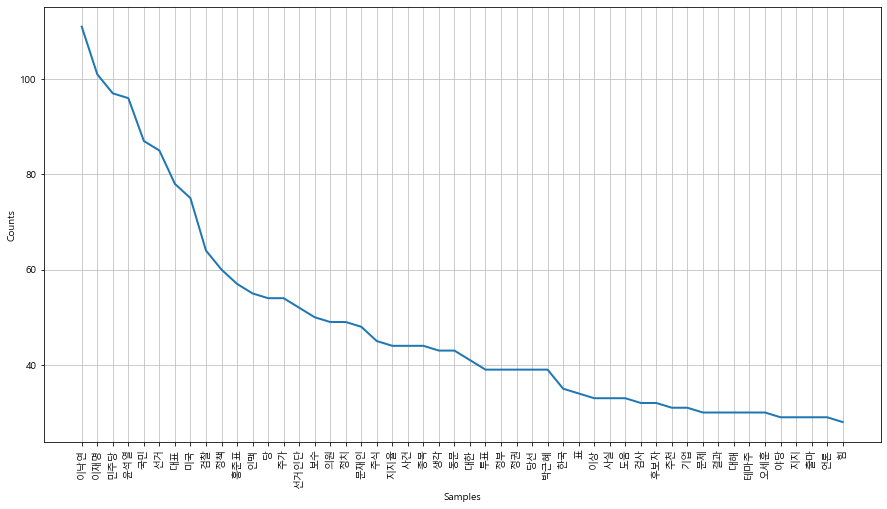

In [69]:
new_ko = nltk.Text(ko, name='차기 대선후보')

plt.figure(figsize=(15, 8))
new_ko.plot(50)
plt.show()

In [70]:
from wordcloud import WordCloud
from PIL import Image

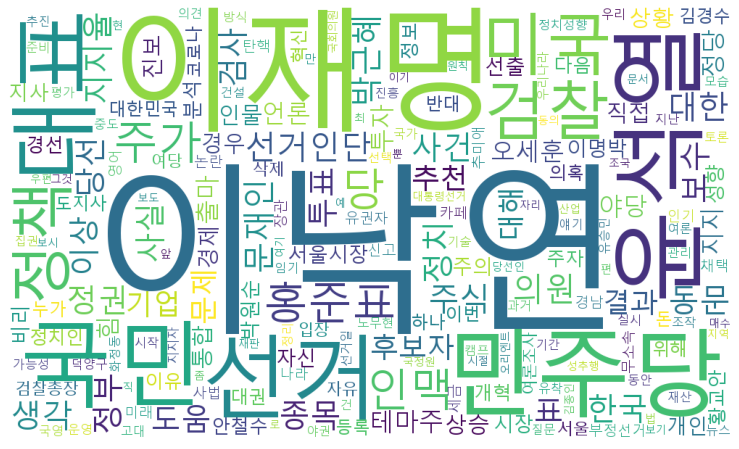

In [71]:
data = new_ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.2,
                      background_color='white',
                      width=1000, height=600
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

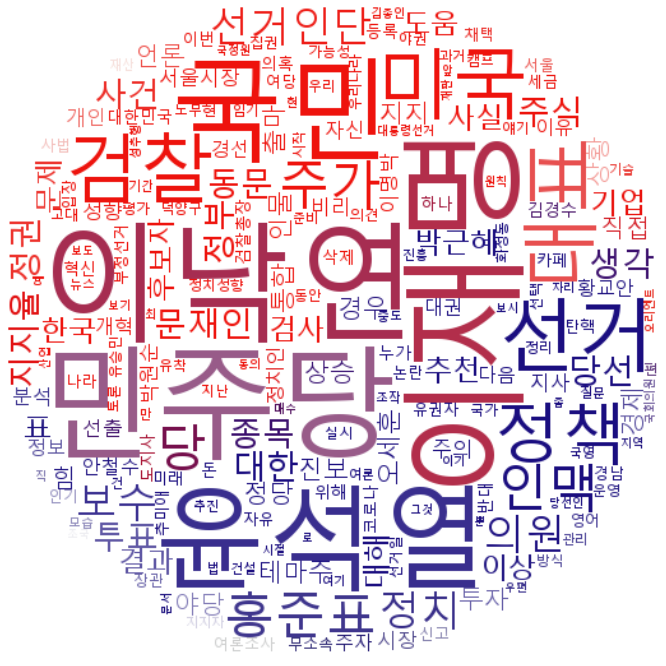

In [72]:
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('./data/taegeuk.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.1, mask=mask,
                      background_color='white',
                      min_font_size=1,
                      max_font_size=100
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()